# Creation of recovered data (estimated)

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from IPython import display

## 1. Creation of the array with the recovered values in time

In [2]:
# Reading deaths raw file as dictionary
df = pd.read_excel('Germany_OWID_Confirmed_Deaths.xlsx')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,DEU,Europe,Germany,2020-01-22,0,0.0,0,0.0
1,DEU,Europe,Germany,2020-01-23,0,0.0,0,0.0
2,DEU,Europe,Germany,2020-01-24,0,0.0,0,0.0
3,DEU,Europe,Germany,2020-01-25,0,0.0,0,0.0
4,DEU,Europe,Germany,2020-01-26,0,0.0,0,0.0


In [3]:
# Obtaining the deaths values since the beginning
T_deaths_original = df.values[:,6]

T_deaths_original[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 3], dtype=object)

In [4]:
# Creation of New Deaths (Death[t] - Death[t-1])

N_deaths = np.empty(len(T_deaths_original), dtype = object)
N_deaths[0] = 0  # First value is 0
for i in range(1, len(N_deaths)):
    result = T_deaths_original[i] - T_deaths_original[i-1]
    if result >= 0:
        N_deaths[i] = result
    else:
        N_deaths[i] = 0

N_deaths.shape, N_deaths

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 1, 0, 4, 2, 2, 6, 7, 4, 16, 23, 17, 10, 29, 34, 49,
        61, 75, 91, 100, 112, 130, 145, 187, 168, 169, 140, 226, 206, 333,
        258, 160, 0, 286, 172, 100, 510, 248, 300, 107, 127, 276, 171, 246,
        296, 185, 117, 99, 150, 188, 153, 156, 113, 76, 54, 127, 0, 282,
        117, 118, 39, 20, 92, 77, 123, 23, 13, 41, 24, 41, 78, 63, 59, 25,
        33, 22, 26, 63, 56, 42, 34, 26, 10, 15, 8, 39, 33, 23, 15, 12, 10,
        41, 16, 20, 11, 10, 8, 6, 13, 31, 24, 12, 8, 0, 4, 15, 14, 12, 25,
        3, 0, 8, 14, 5, 11, 4, 10, 3, 0, 10, 14, 11, 6, 7, 1, 3, 4, 2, 7,
        1, 3, 1, 2, 5, 3, 8, 10, 4, 0, 1, 6, 4, 9, 3, 7, 0, 0, 9, 16, 2,
        14, 6, 1, 1, 5, 5, 4, 13, 5, 0, 1, 5, 8, 14, 3, 6, 3, 1, 5, 4, 5,
        0, 9, 1, 3, 4, 15, 0, 5, 2, 1, 1, 5, 6, 3, 3, 4, 2, 2, 11, 6, 3,
        10, 2, 2, 0, 15, 

In [5]:
# Creation of Fixed Total Deaths (Accumulative sum of N_deaths array)
T_deaths_fix = np.empty(len(T_deaths_original), dtype = object)
T_deaths_fix[0] = 0

sum_T = 0
for i in range(1, len(T_deaths_original)):
    sum_T = sum_T + N_deaths[i]
    T_deaths_fix[i] = sum_T

T_deaths_fix.shape, T_deaths_fix

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 2, 3, 3, 7, 9, 11, 17, 24, 28, 44, 67, 84, 94, 123,
        157, 206, 267, 342, 433, 533, 645, 775, 920, 1107, 1275, 1444,
        1584, 1810, 2016, 2349, 2607, 2767, 2767, 3053, 3225, 3325, 3835,
        4083, 4383, 4490, 4617, 4893, 5064, 5310, 5606, 5791, 5908, 6007,
        6157, 6345, 6498, 6654, 6767, 6843, 6897, 7024, 7024, 7306, 7423,
        7541, 7580, 7600, 7692, 7769, 7892, 7915, 7928, 7969, 7993, 8034,
        8112, 8175, 8234, 8259, 8292, 8314, 8340, 8403, 8459, 8501, 8535,
        8561, 8571, 8586, 8594, 8633, 8666, 8689, 8704, 8716, 8726, 8767,
        8783, 8803, 8814, 8824, 8832, 8838, 8851, 8882, 8906, 8918, 8926,
        8926, 8930, 8945, 8959, 8971, 8996, 8999, 8999, 9007, 9021, 9026,
        9037, 9041, 9051, 9054, 9054, 9064, 9078, 9089, 9095, 9102, 9103,
        9106, 9110, 9112, 9119, 91

In [6]:
# Reading confirmed raw file as dictionary
df = pd.read_excel('Germany_OWID_Confirmed_Deaths.xlsx')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,DEU,Europe,Germany,2020-01-22,0,0.0,0,0.0
1,DEU,Europe,Germany,2020-01-23,0,0.0,0,0.0
2,DEU,Europe,Germany,2020-01-24,0,0.0,0,0.0
3,DEU,Europe,Germany,2020-01-25,0,0.0,0,0.0
4,DEU,Europe,Germany,2020-01-26,0,0.0,0,0.0


In [7]:
# Obtaining the confirmed values since the beginning
T_cases_original = df.values[:,4]
N_cases_original = df.values[:,5]

T_cases_original[0:20], N_cases_original[0:20]

(array([0, 0, 0, 0, 0, 1, 4, 4, 4, 5, 8, 10, 12, 12, 12, 12, 13, 13, 14,
        14], dtype=object),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 1.0, 3.0, 2.0, 2.0,
        0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], dtype=object))

In [8]:
# Creation of New Confirmed (Confirmed[t] - Confirmed[t-1])

N_confirmed = np.empty(len(T_cases_original), dtype = object)
N_confirmed[0] = 0  # First value is 0
for i in range(1, len(N_confirmed)):
    result = T_cases_original[i] - T_cases_original[i-1]
    if result >= 0:
        N_confirmed[i] = result
    else:
        N_confirmed[i] = 0

N_confirmed.shape, N_confirmed

((793,),
 array([0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 3, 2, 2, 0, 0, 0, 1, 0, 1, 0, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 10, 19, 2, 31, 51, 29, 37,
        66, 220, 188, 129, 241, 136, 281, 451, 170, 1597, 910, 1210, 1477,
        1985, 3070, 2993, 4528, 2365, 2660, 4183, 3930, 4337, 6615, 6933,
        6824, 4400, 4790, 4923, 6064, 6922, 6365, 4933, 4031, 3251, 4289,
        5633, 4885, 3990, 2737, 2946, 2218, 1287, 3394, 2945, 3699, 1945,
        1842, 1881, 1226, 2357, 2481, 1870, 1514, 1257, 988, 1154, 1627,
        1470, 1068, 890, 697, 488, 855, 1155, 1268, 1158, 736, 555, 697,
        595, 927, 380, 755, 519, 617, 182, 1227, 695, 548, 689, 276, 342,
        272, 600, 324, 672, 726, 267, 221, 184, 285, 242, 351, 452, 526,
        300, 359, 397, 16, 169, 535, 41, 251, 164, 570, 352, 1213, 482,
        371, 602, 496, 712, 391, 500, 665, 422, 235, 349, 376, 475, 477,
        410, 418, 325, 541, 279, 356, 302, 331, 377, 210, 261, 276, 434,
        560, 595, 381, 309, 590, 39

In [9]:
# Creation of Fixed Total Confirmed (Accumulative sum of N_confirmed array)
T_confirmed_fix = np.empty(len(N_confirmed), dtype = object)
T_confirmed_fix[0] = 0

sum_T = 0
for i in range(1, len(N_confirmed)):
    sum_T = sum_T + N_confirmed[i]
    T_confirmed_fix[i] = sum_T

T_confirmed_fix.shape, T_confirmed_fix

((793,),
 array([0, 0, 0, 0, 0, 1, 4, 4, 4, 5, 8, 10, 12, 12, 12, 12, 13, 13, 14,
        14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 27,
        46, 48, 79, 130, 159, 196, 262, 482, 670, 799, 1040, 1176, 1457,
        1908, 2078, 3675, 4585, 5795, 7272, 9257, 12327, 15320, 19848,
        22213, 24873, 29056, 32986, 37323, 43938, 50871, 57695, 62095,
        66885, 71808, 77872, 84794, 91159, 96092, 100123, 103374, 107663,
        113296, 118181, 122171, 124908, 127854, 130072, 131359, 134753,
        137698, 141397, 143342, 145184, 147065, 148291, 150648, 153129,
        154999, 156513, 157770, 158758, 159912, 161539, 163009, 164077,
        164967, 165664, 166152, 167007, 168162, 169430, 170588, 171324,
        171879, 172576, 173171, 174098, 174478, 175233, 175752, 176369,
        176551, 177778, 178473, 179021, 179710, 179986, 180328, 180600,
        181200, 181524, 182196, 182922, 183189, 183410, 183594, 183879,
        184121, 184472, 184924, 185450, 185750, 1

In [10]:
# Creation of Fixed Total Alive Confirmed (Accumulative sum of N_confirmed array - Total Deaths)
T_confirmed_alive_fix = np.empty(len(T_confirmed_fix), dtype = object)

for i in range(0, len(T_confirmed_fix)):
    T_confirmed_alive_fix[i] = T_confirmed_fix[i] - T_deaths_fix[i]

T_confirmed_alive_fix.shape, T_confirmed_alive_fix

((793,),
 array([0, 0, 0, 0, 0, 1, 4, 4, 4, 5, 8, 10, 12, 12, 12, 12, 13, 13, 14,
        14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 27,
        46, 48, 79, 130, 159, 196, 262, 482, 670, 799, 1040, 1174, 1455,
        1905, 2075, 3668, 4576, 5784, 7255, 9233, 12299, 15276, 19781,
        22129, 24779, 28933, 32829, 37117, 43671, 50529, 57262, 61562,
        66240, 71033, 76952, 83687, 89884, 94648, 98539, 101564, 105647,
        110947, 115574, 119404, 122141, 124801, 126847, 128034, 130918,
        133615, 137014, 138852, 140567, 142172, 143227, 145338, 147523,
        149208, 150605, 151763, 152601, 153567, 155041, 156355, 157310,
        158124, 158767, 159128, 159983, 160856, 162007, 163047, 163744,
        164279, 164884, 165402, 166206, 166563, 167305, 167783, 168376,
        168517, 169666, 170298, 170787, 171451, 171694, 172014, 172260,
        172797, 173065, 173695, 174387, 174628, 174839, 175008, 175285,
        175488, 175806, 176235, 176746, 177034, 17

In [11]:
# Estimation Recovered Accumulated

Ac_recovered = np.empty(len(T_confirmed_fix), dtype = object)

# First 14 values
for i in range(0, 14, 1):
    Ac_recovered[i] = 0

for i in range(14, len(T_confirmed_fix), 1):
    Ac_recovered[i] = T_confirmed_alive_fix[i-14]

# Ac_recovered.shape, Ac_recovered[0:20], Ac_recovered[-10:-1], Ac_recovered[-1]
Ac_recovered.shape, Ac_recovered[0:200], Ac_recovered[-10:-1], Ac_recovered[-1]

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 4,
        4, 5, 8, 10, 12, 12, 12, 12, 13, 13, 14, 14, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 27, 46, 48, 79, 130, 159,
        196, 262, 482, 670, 799, 1040, 1174, 1455, 1905, 2075, 3668, 4576,
        5784, 7255, 9233, 12299, 15276, 19781, 22129, 24779, 28933, 32829,
        37117, 43671, 50529, 57262, 61562, 66240, 71033, 76952, 83687,
        89884, 94648, 98539, 101564, 105647, 110947, 115574, 119404,
        122141, 124801, 126847, 128034, 130918, 133615, 137014, 138852,
        140567, 142172, 143227, 145338, 147523, 149208, 150605, 151763,
        152601, 153567, 155041, 156355, 157310, 158124, 158767, 159128,
        159983, 160856, 162007, 163047, 163744, 164279, 164884, 165402,
        166206, 166563, 167305, 167783, 168376, 168517, 169666, 170298,
        170787, 171451, 171694, 172014, 172260, 172797, 173065, 173695,
        174387, 174628, 174839, 175008, 175285, 

In [12]:
# Recovered Smooth Accumulated (14 days - 7 days average)

Ac_recovered_smooth = np.empty(len(Ac_recovered)-6, dtype = object)  # 6 first values are not available
for i in range(0, len(Ac_recovered)-6):
    sum_Ac = 0
    for j in range(i, i+7):
        sum_Ac = sum_Ac + Ac_recovered[j]
    Ac_recovered_smooth[i] = (sum_Ac/7)

Ac_recovered_smooth.shape, Ac_recovered_smooth

((787,),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.14285714285714285, 0.7142857142857143, 1.2857142857142858,
        1.8571428571428572, 2.5714285714285716, 3.7142857142857144,
        5.142857142857143, 6.714285714285714, 7.857142857142857, 9.0,
        10.142857142857142, 11.285714285714286, 12.0, 12.571428571428571,
        12.857142857142858, 13.428571428571429, 14.0, 14.571428571428571,
        15.0, 15.428571428571429, 15.714285714285714, 16.0, 16.0, 16.0,
        16.0, 16.0, 16.0, 16.0, 16.0, 16.142857142857142,
        17.714285714285715, 22.0, 26.571428571428573, 35.57142857142857,
        51.857142857142854, 72.28571428571429, 97.85714285714286,
        131.42857142857142, 193.71428571428572, 282.57142857142856,
        385.42857142857144, 515.4285714285714, 660.4285714285714,
        840.2857142857143, 1075.0, 1302.5714285714287, 1730.857142857143,
        2270.4285714285716, 2948.1428571428573, 3816.8571428571427, 4928.0,
        64

## 2. Creation of the final dataset

In [13]:
# Reading confirmed file as dictionary, to extract some columns
df = pd.read_csv('Confirmed_DEU.csv')
df.head()

,ISO_code,Continent,Country/Region,Date,Total Confirmed,New Confirmed,New Confirmed Smooth (7 days),Total Confirmed Fixed (sum New Confirmed),Total Alive Confirmed Fixed (sum New Confirmed - Total Deaths),Accumulated Alive Confirmed in 14 days,Accumulated Alive Confirmed Smooth in 14 days
0,DEU,Europe,Germany,2020-01-28,4,3,0.571429,4,4,4,0.714286
1,DEU,Europe,Germany,2020-01-29,4,0,0.571429,4,4,4,1.285714
2,DEU,Europe,Germany,2020-01-30,4,0,0.571429,4,4,4,1.857143
3,DEU,Europe,Germany,2020-01-31,5,1,0.714286,5,5,5,2.571429
4,DEU,Europe,Germany,2020-02-01,8,3,1.142857,8,8,8,3.714286


In [14]:
# Arrays which will form the final dataframe of Recovered
iso_code = df.values[:, 0]
continent = df.values[:, 1]
region = df.values[:, 2]
dates = df.values[:, 3]

iso_code[0:5], continent[0:5], region[0:5], dates[0:5]

(array(['DEU', 'DEU', 'DEU', 'DEU', 'DEU'], dtype=object),
 array(['Europe', 'Europe', 'Europe', 'Europe', 'Europe'], dtype=object),
 array(['Germany', 'Germany', 'Germany', 'Germany', 'Germany'],
       dtype=object),
 array(['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
        '2020-02-01'], dtype=object))

In [15]:
# Array concatenation for building the final dataframe

columns = 6  # Number of columns
X_total = np.empty((len(Ac_recovered_smooth), columns), dtype = object)

for i in range(len(Ac_recovered_smooth)):
    X_total[i] = [iso_code[i], continent[i], region[i], dates[i],
                  Ac_recovered[i+6], Ac_recovered_smooth[i]]
    
X_total.shape, X_total[0:10]

((787, 6),
 array([['DEU', 'Europe', 'Germany', '2020-01-28', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-01-29', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-01-30', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-01-31', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-02-01', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-02-02', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-02-03', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-02-04', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-02-05', 0, 0.0],
        ['DEU', 'Europe', 'Germany', '2020-02-06', 0, 0.0]], dtype=object))

In [16]:
# Labels of each column of the dataframe
labels = ['ISO_code', 'Continent', 'Country/Region', 'Date',
          'Total Recovered', 'Total Recovered Smooth (7 days)']

In [17]:
# Creation of the final dataframe
df_recovered = pd.DataFrame(data=X_total, columns=labels)
df_recovered

,ISO_code,Continent,Country/Region,Date,Total Recovered,Total Recovered Smooth (7 days)
0,DEU,Europe,Germany,2020-01-28,0,0.0
1,DEU,Europe,Germany,2020-01-29,0,0.0
2,DEU,Europe,Germany,2020-01-30,0,0.0
3,DEU,Europe,Germany,2020-01-31,0,0.0
4,DEU,Europe,Germany,2020-02-01,0,0.0
...,...,...,...,...,...,...
782,DEU,Europe,Germany,2022-03-20,15774422,15310864.857143
783,DEU,Europe,Germany,2022-03-21,15941545,15475278.142857
784,DEU,Europe,Germany,2022-03-22,16202293,15668081.0
785,DEU,Europe,Germany,2022-03-23,16464819,15869906.571429


In [18]:
# Export dataframe to a csv file

from pathlib import Path  
filepath = Path('Recovered_DEU_EST.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_recovered.to_csv(filepath, index=False)

Text(0.5, 1.0, 'Recovered Estimated')

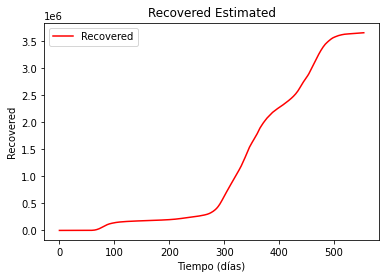

In [19]:
plt.plot(range(0, 555), Ac_recovered_smooth[0:555], 'r', label="Recovered")
plt.xlabel("Tiempo (días)")
plt.ylabel("Recovered")
plt.legend()

plt.title("Recovered Estimated")

In [20]:
Ac_recovered_smooth[787-18], dates[787-18]

(13260599.142857144, '2022-03-07')